# Company Bankruptcy Prediction

Project Aim:
To build a classification model that predicts company bankruptcy using financial ratios and operational metrics.

Objective:
To predict whether a company will go bankrupt based on financial indicators.
This helps investors and financial institutions reduce risk by identifying high-risk companies at an early stage.

Problem Type : 
This is a binary classification problem.

In [86]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, ConfusionMatrixDisplay

In [48]:
df = pd.read_csv('data.csv')

In [49]:
# First 5 rows
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [50]:
# Random 5 rows
df.sample(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
561,0,0.399844,0.441016,0.440495,0.591973,0.591973,0.998851,0.797007,0.808956,0.303103,...,0.735254,0.000909,0.623972,0.591971,0.836591,0.276256,0.026775,0.565082,1,0.071713
3113,0,0.475747,0.538487,0.523261,0.597393,0.597393,0.998972,0.797390,0.809312,0.303520,...,0.798148,0.002871,0.623767,0.597394,0.840745,0.314101,0.027125,0.566369,1,0.012687
5240,0,0.549944,0.596380,0.597944,0.619215,0.619215,0.999238,0.797707,0.809590,0.303516,...,0.827227,0.003298,0.629254,0.619210,0.841905,0.276660,0.026812,0.565256,1,0.059159
4376,1,0.387413,0.444614,0.430751,0.593220,0.593220,0.998839,0.797232,0.809165,0.303522,...,0.737802,0.004405,0.623770,0.593217,0.831685,0.288774,0.026739,0.564896,1,0.017101
5542,0,0.519768,0.577628,0.561004,0.607482,0.607482,0.999089,0.797601,0.809460,0.303643,...,0.822163,0.002084,0.624130,0.607483,0.841658,0.276960,0.026791,0.565158,1,0.052714


In [51]:
# Shape of dataset 
df.shape

(6819, 96)

In [52]:
# Column names 
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [53]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [54]:
# Check missing values 
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [55]:
# Total missing values 
df.isnull().sum().sum()

0

In [56]:
# Check duplicated rows 
df.duplicated().sum()

0

In [57]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# Dataset Observation : 
- Dataset have 6819 Rows and 96 Columns. 
- All columns are numeric. 
- No Missing values are present in dataset.
- No duplicated row are present in dataset.
- Column names have extra spaces need to fix it.

# Exploratory Data Analysis (EDA)

Target Variable Distribution

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

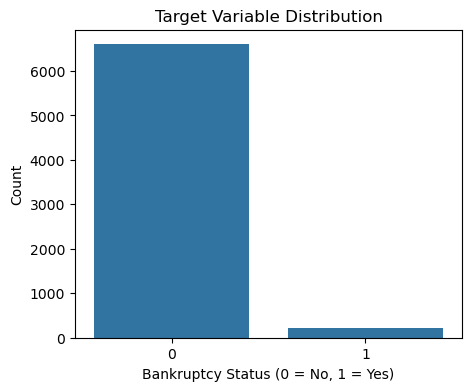

In [58]:
plt.figure(figsize=(5,4))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Bankruptcy Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
df['Bankrupt?'].value_counts()

# Class Imbalance Analysis:
The target variable Bankrupt? is highly imbalanced. Only a small percentage of companies are bankrupt compared to non-bankrupt companies.

# Correlation with target variable

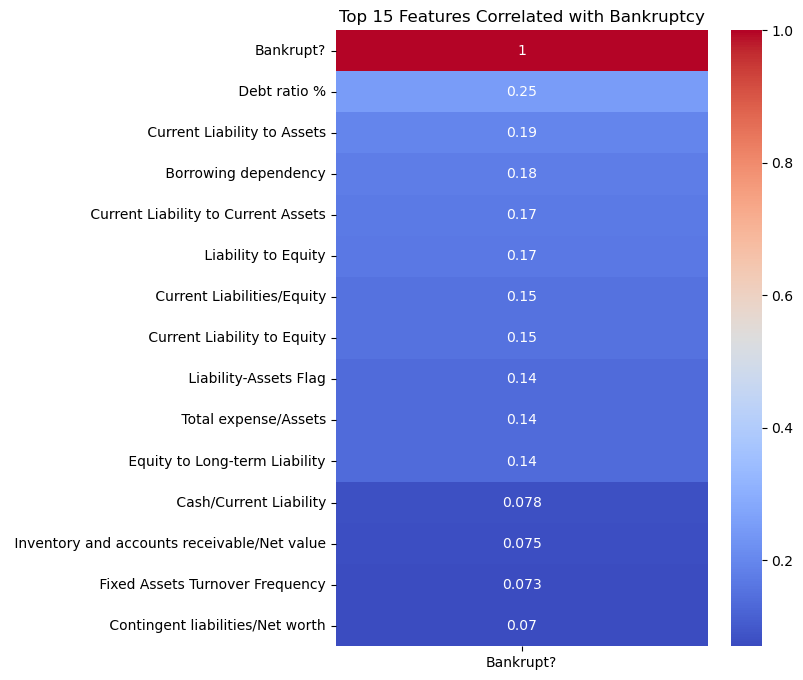

In [59]:
corr = df.corr()

top_corr = corr['Bankrupt?'].sort_values(ascending=False).head(15)

plt.figure(figsize=(6,8))
sns.heatmap(
    top_corr.to_frame(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Top 15 Features Correlated with Bankruptcy');

# Data Preprocessing

Handle extra spaces in column names

In [60]:
df.columns = df.columns.str.strip()

Separate Target and Features

In [61]:
X = df.drop(['Bankrupt?'],axis = 1) 
y = df['Bankrupt?']

Separate Training and Testing data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

Evaluation funcion

In [63]:
def evaluation(model, X_train, X_test, y_train, y_test, model_name=''):

    results = {'Model Name': model_name}

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    if hasattr(model, 'predict_proba'):
        cv_score = cross_val_score(
            model,
            X_train,
            y_train,
            cv=cv,
            scoring='roc_auc'
        )
        results['roc_auc_cv_mean'] = cv_score.mean()
    else: 
        results['roc_auc_cv_mean'] = None

    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    results.update({
        'Train_accuracy': accuracy_score(y_train, y_train_pred),
        'Test_accuracy': accuracy_score(y_test, y_test_pred),
        'Recall_train': recall_score(y_train, y_train_pred),
        'Recall_test': recall_score(y_test, y_test_pred),
        'Precision_train': precision_score(y_train, y_train_pred),
        'Precision_test': precision_score(y_test, y_test_pred),
        'F1_score_train': f1_score(y_train, y_train_pred),
        'F1_score_test': f1_score(y_test, y_test_pred)
    })

    # ROC-AUC on test set
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test)[:, 1]
        results['roc_auc_score'] = roc_auc_score(y_test, y_test_proba)
    else:
        results['roc_auc_score'] = None

    return results

ConfusionMatrixDisplay function

In [64]:
def cmd(model, X_test, y_test): 
    ConfusionMatrixDisplay.from_estimator(
        model, 
        X_test, 
        y_test, 
        display_labels = model.classes_,
        cmap = 'Blues'
    )

# Model building with Pipeline

# Logistic Regression

In [65]:
lr_pipe = ImbPipeline(steps = [
    ('scaler', StandardScaler()), 
    ('smote', SMOTE(random_state = 42)), 
    ('model', LogisticRegression(max_iter = 1000))
])

In [66]:
lr_metrics = evaluation(lr_pipe, X_train, X_test, y_train, y_test, model_name = 'Logistic Regression')
lr_metrics

{'Model Name': 'Logistic Regression',
 'roc_auc_cv_mean': 0.8873747546555603,
 'Train_accuracy': 0.8839596700274978,
 'Test_accuracy': 0.8826979472140762,
 'Recall_train': 0.8920454545454546,
 'Recall_test': 0.7954545454545454,
 'Precision_train': 0.20363164721141375,
 'Precision_test': 0.1881720430107527,
 'F1_score_train': 0.33157338965153116,
 'F1_score_test': 0.30434782608695654,
 'roc_auc_score': 0.9145833333333333}

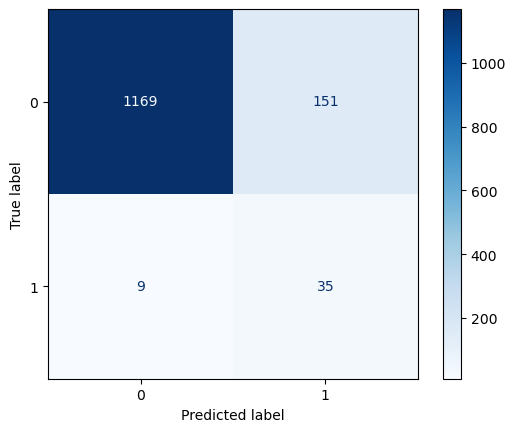

In [67]:
lr_cmd = cmd(lr_pipe,X_test, y_test)

# Decision Tree

In [68]:
dt = (DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 3, min_samples_split = 5, random_state = 42, class_weight = 'balanced'))

In [69]:
dt_metrics = evaluation(dt, X_train, X_test, y_train, y_test, model_name = 'Decision Tree')
dt_metrics

{'Model Name': 'Decision Tree',
 'roc_auc_cv_mean': 0.753330046401729,
 'Train_accuracy': 0.9143904674610449,
 'Test_accuracy': 0.8980938416422287,
 'Recall_train': 1.0,
 'Recall_test': 0.7272727272727273,
 'Precision_train': 0.2737169517884914,
 'Precision_test': 0.20125786163522014,
 'F1_score_train': 0.4297924297924298,
 'F1_score_test': 0.31527093596059114,
 'roc_auc_score': 0.8273932506887053}

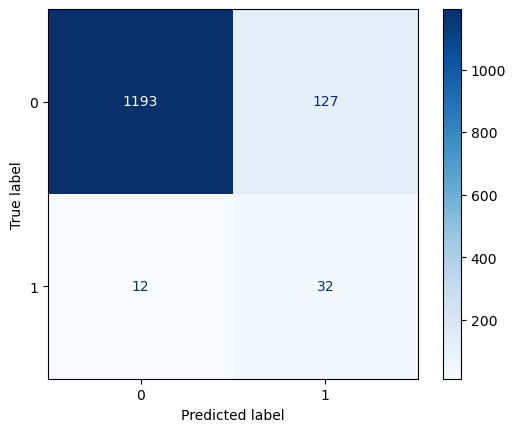

In [70]:
dt_cmd = cmd(dt, X_test, y_test)

# Random Forest

In [71]:
rf =  (RandomForestClassifier(n_estimators = 300,max_depth = 5, min_samples_leaf = 3, min_samples_split = 5, n_jobs = -1, random_state = 42, class_weight = 'balanced'))

In [72]:
rf_metrics = evaluation(rf, X_train, X_test, y_train, y_test, model_name = 'Random Forest')
rf_metrics

{'Model Name': 'Random Forest',
 'roc_auc_cv_mean': 0.933755330043837,
 'Train_accuracy': 0.9384051329055912,
 'Test_accuracy': 0.9281524926686217,
 'Recall_train': 0.9375,
 'Recall_test': 0.7272727272727273,
 'Precision_train': 0.336734693877551,
 'Precision_test': 0.2711864406779661,
 'F1_score_train': 0.4954954954954955,
 'F1_score_test': 0.3950617283950617,
 'roc_auc_score': 0.9443526170798898}

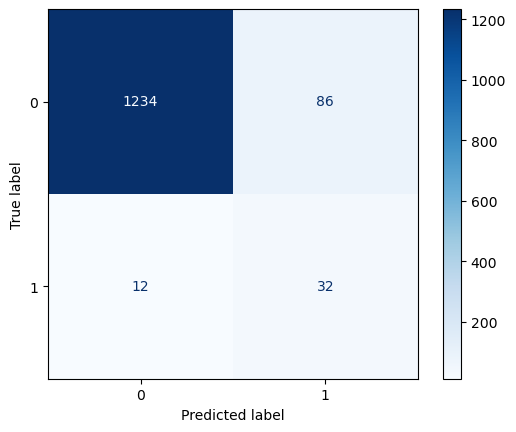

In [73]:
rf_cmd = cmd(rf, X_test, y_test)

# Result compairison

In [74]:
results = []

results.append(lr_metrics), 
results.append(dt_metrics), 
results.append(rf_metrics)
res = pd.DataFrame(results).T
res

,0,1,2
Model Name,Logistic Regression,Decision Tree,Random Forest
roc_auc_cv_mean,0.887375,0.75333,0.933755
Train_accuracy,0.88396,0.91439,0.938405
Test_accuracy,0.882698,0.898094,0.928152
Recall_train,0.892045,1.0,0.9375
Recall_test,0.795455,0.727273,0.727273
Precision_train,0.203632,0.273717,0.336735
Precision_test,0.188172,0.201258,0.271186
F1_score_train,0.331573,0.429792,0.495495
F1_score_test,0.304348,0.315271,0.395062


# Threshold Tuning

In [75]:
def threshold_tuning(model, X_train, X_test, y_train, y_test, thresholds = None, model_name = ''):

    if thresholds is None:
        thresholds = [0.05, 0.1, 0.2, 0.3, 0.4]

    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]

    results = []

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)

        results.append({
            'Model Name': model_name,
            'Threshold': t,
            'Recall': recall_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'F1_score': f1_score(y_test, y_pred)
        })

    return pd.DataFrame(results)

In [76]:
threshold_results = threshold_tuning(
    rf,
    X_train,
    X_test,
    y_train,
    y_test,
    model_name='Random Forest'
)

threshold_results

,Model Name,Threshold,Recall,Precision,F1_score
0,Random Forest,0.05,1.000000,0.079279,0.146912
1,Random Forest,0.10,0.977273,0.112861,0.202353
2,Random Forest,0.20,0.863636,0.154472,0.262069
3,Random Forest,0.30,0.818182,0.195652,0.315789
4,Random Forest,0.40,0.818182,0.246575,0.378947


Final threshold is 0.3 because it provide better results than other threshold.

In [77]:
final_threshold = 0.3
y_prob = rf.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= final_threshold).astype(int)

In [78]:
print('Test_recall', recall_score(y_test, y_pred)),
print('Test_precision', precision_score(y_test, y_pred)),
print('Test_f1_score', f1_score(y_test, y_pred))

Test_recall 0.8181818181818182
Test_precision 0.1956521739130435
Test_f1_score 0.3157894736842105


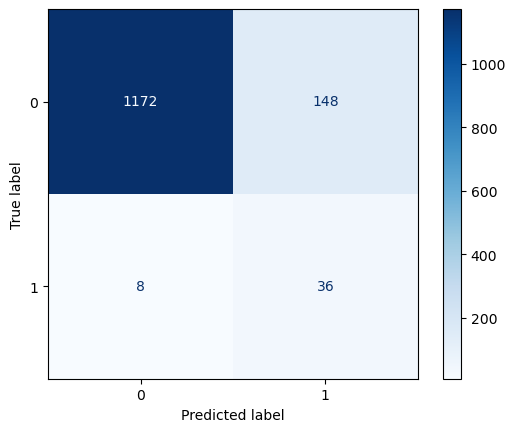

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

# Final Model Choice:
Tuned Random Forest was selected because it achieved the highest recall and ROC-AUC on the test set, making it suitable for bankruptcy risk detection where false negatives are costly.

# Feature Importance

In [80]:
best_model = rs.best_estimator_

In [81]:
feature_imp = pd.DataFrame({
    'Features' : X.columns,
    'Importance' : best_model.feature_importances_
}).sort_values(by = 'Importance', ascending = False)
top_features = feature_imp.head(15)
top_features

,Features,Importance
39,Borrowing dependency,0.057118
85,Net Income to Total Assets,0.050138
18,Persistent EPS in the Last Four Seasons,0.045256
35,Total debt/Total net worth,0.043711
9,Continuous interest rate (after tax),0.040182
67,Retained Earnings to Total Assets,0.038889
68,Total income/Total expense,0.033864
90,Liability to Equity,0.031213
36,Debt ratio %,0.028555
37,Net worth/Assets,0.028000


Text(0.5, 1.0, 'Top 15 Important Features')

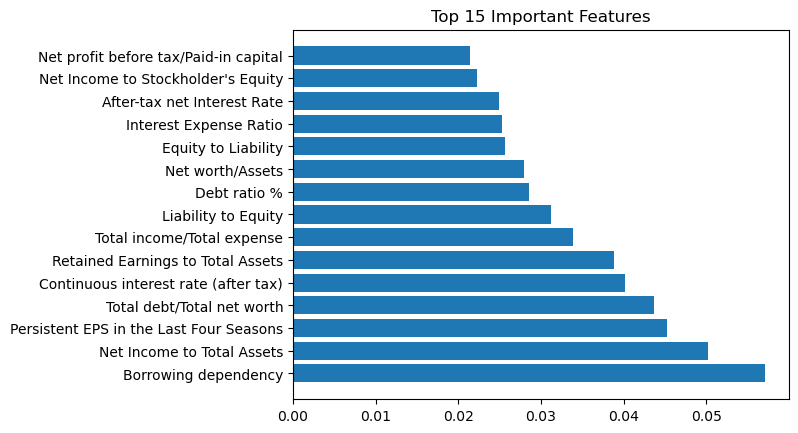

In [82]:
plt.barh(top_features['Features'], top_features['Importance'])
plt.title('Top 15 Important Features')

# Conclusion

This project developed a machine learning model to predict company bankruptcy using financial ratios. After evaluating multiple models, a tuned Random Forest with probability threshold optimization was selected due to its high recall and strong ROC-AUC performance, significantly reducing missed bankrupt cases. Feature importance analysis showed that profitability and debt-related ratios are the most influential indicators of financial distress.